In [1]:
import json
import math
import os
from glob import glob 
from tqdm import tqdm
from PIL import Image
import cv2 
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 


from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

from keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.applications.vgg19 import VGG19
from keras.utils.np_utils import to_categorical
from keras.layers import  Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator,image,img_to_array,load_img

In [2]:
input_dir = "/content/drive/MyDrive/Brain Tumor Data Set/Brain Tumor Data Set/"
train_path = input_dir + "Train/"
val_path = input_dir + "Test/"

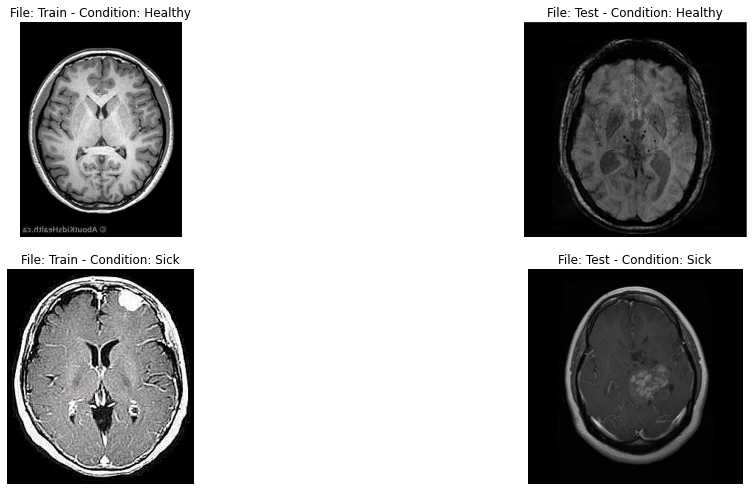

In [3]:
fig, ax = plt.subplots(2,2, figsize=(15,7))
ax = ax.ravel()
#/content/drive/MyDrive/Brain Tumor Data Set/Brain Tumor Data Set/Test/Healthy
plt.tight_layout()
for i, _set in enumerate(["Train", "Test"]):
    set_path = input_dir+_set
    ax[i].axis('off')
    ax[i].imshow(plt.imread(set_path+"/Healthy/"+os.listdir(set_path+"/Healthy")[0]))
    ax[i].set_title('File: {} - Condition: Healthy'.format(_set))
    ax[i+2].axis('off')
    ax[i+2].imshow(plt.imread(set_path+"/Brain Tumor/"+os.listdir(set_path+"/Brain Tumor")[0]))
    ax[i+2].set_title('File: {} - Condition: Sick'.format(_set))

In [4]:
train_datagen = ImageDataGenerator(
      rescale=1/255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1/255)

In [5]:
train_data = train_datagen.flow_from_directory(
        train_path,
        target_size=(256, 256),
        batch_size=8,
        class_mode='binary')
test_data = test_datagen.flow_from_directory(
        val_path,
        target_size=(256, 256),
        batch_size=8,
        class_mode='binary')


Found 3690 images belonging to 2 classes.
Found 920 images belonging to 2 classes.


In [6]:
len(train_data)

462

In [7]:
len(test_data)

115

In [8]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}

In [9]:
test_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}

In [10]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),padding="same",activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [11]:
model.compile(
    loss='binary_crossentropy',
    optimizer="adam",
    metrics=['acc']
    )

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [13]:
hist = model.fit_generator(
    train_data,
    steps_per_epoch=len(train_data),
    epochs=10,
    validation_data=test_data,
    validation_steps=len(test_data)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
462/462 [==============================] - 1975s 4s/step - loss: 0.6857 - acc: 0.5775 - val_loss: 0.6978 - val_acc: 0.5663
Epoch 2/10
462/462 [==============================] - 66s 143ms/step - loss: 0.6354 - acc: 0.6575 - val_loss: 0.6404 - val_acc: 0.6891
Epoch 3/10
462/462 [==============================] - 66s 143ms/step - loss: 0.6124 - acc: 0.6786 - val_loss: 0.6635 - val_acc: 0.6402
Epoch 4/10
462/462 [==============================] - 66s 144ms/step - loss: 0.5916 - acc: 0.6851 - val_loss: 0.6478 - val_acc: 0.6946
Epoch 5/10
462/462 [==============================] - 65s 142ms/step - loss: 0.5767 - acc: 0.7084 - val_loss: 0.7206 - val_acc: 0.6848
Epoch 6/10
462/462 [==============================] - 65s 142ms/step - loss: 0.5687 - acc: 0.7198 - val_loss: 0.6405 - val_acc: 0.6772
Epoch 7/10
462/462 [==============================] - 65s 142ms/step - loss: 0.5463 - acc: 0.7344 - val_loss: 0.6571 - val_acc: 0.6587
Epoch 8/10
462/462 [==============================] - 66

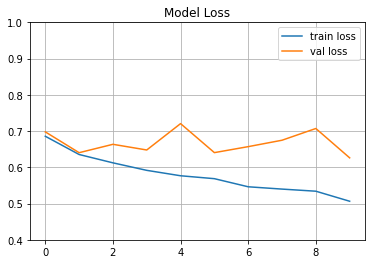

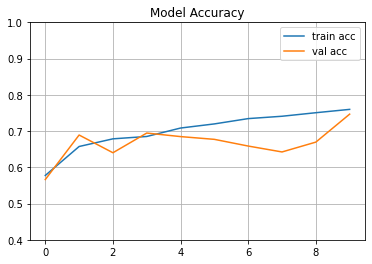

In [14]:
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.axis(ymin=0.4,ymax=1)
plt.title('Model Loss')
plt.grid()
plt.legend()
plt.show()



# plot the accuracy
plt.plot(hist.history['acc'], label='train acc')
plt.plot(hist.history['val_acc'], label='val acc')
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.legend()
plt.show()


In [15]:
results = model.evaluate(test_data, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.62613
Test Accuracy: 74.67%


In [16]:
predictions = np.argmax(model.predict(test_data), axis=1)

cm = confusion_matrix(test_data.labels, predictions)
clr = classification_report(test_data.labels, predictions, target_names=test_data.class_indices, zero_division=0)

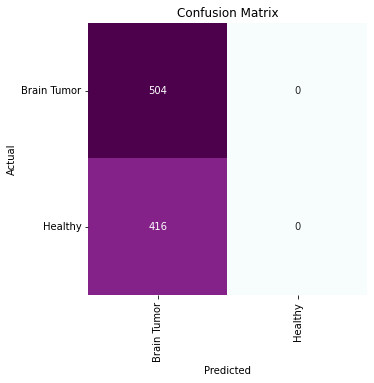

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='BuPu', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=test_data.class_indices, rotation=90)
plt.yticks(ticks=np.arange(2) + 0.5, labels=test_data.class_indices, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()